In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Part 3: Working with the dataset

There's no data science without data, so we'll start thinking about ways to acquire data. You've already played around with reading/writing text from files. The exercises today focus on our big CSV file.

Let's start by think a bit more about the crime-data file from San Francisco that you downloaded last week. The file has may columns, and today we'll be working with

* The various categories of crimes
* Crime over the years
* What time of day do crimes occur?
* And do certain crime-types tend to happen in specific neighborhoods?
* We'll play around with geo-data.

All of this can be easily calculated based on the columns in the incident file.

In [2]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


> Mini Exercise:
>
> * Which columns from the CSV file will you need to work on the topics mentioned above?
> * And a little calculation: What is the total number of incidents in the CSV file?

*We will need the columns: `Category`, `Descript`, `Date`, `Time`, `PdDistrict`, together with `X` and `Y` for the geo-mapping.*

In [4]:
df.shape

(2215024, 13)

There are *__2.215.024__* incidents in the dataset.

--- 

In order to do awesome _predictive policing_ later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last 10 years on the San Francisco crime scene. It's going to be a lot of work ... but after mastering these exercises you guys will have some real data science skills!

>Exercise: The types of crime and their popularity over time. The first field we'll dig into is the column "Category".
>1. Use pandas to list and then count all the different categories of crime in the dataset. How many are there?
>
>
>2. Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?
>
>
>3. Create a histogram over crime occurrences. 
>
>
>4. Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2017 (since we don't have full data for 2018). What's the average number of crimes per year?
>
>
>5. Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
>
>
>6. Comment on at least three interesting trends in your plot. Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems'.

_1. Use pandas to list and then count all the different categories of crime in the dataset. How many are there?_

In [5]:
df.Category.unique()

array(['NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'SECONDARY CODES',
       'VANDALISM', 'BURGLARY', 'LARCENY/THEFT', 'DRUG/NARCOTIC',
       'WARRANTS', 'VEHICLE THEFT', 'OTHER OFFENSES', 'WEAPON LAWS',
       'ARSON', 'MISSING PERSON', 'DRIVING UNDER THE INFLUENCE',
       'SUSPICIOUS OCC', 'RECOVERED VEHICLE', 'DRUNKENNESS', 'TRESPASS',
       'FRAUD', 'DISORDERLY CONDUCT', 'SEX OFFENSES, FORCIBLE',
       'FORGERY/COUNTERFEITING', 'KIDNAPPING', 'EMBEZZLEMENT',
       'STOLEN PROPERTY', 'LIQUOR LAWS', 'FAMILY OFFENSES', 'LOITERING',
       'BAD CHECKS', 'TREA', 'GAMBLING', 'RUNAWAY', 'BRIBERY',
       'PROSTITUTION', 'PORNOGRAPHY/OBSCENE MAT',
       'SEX OFFENSES, NON FORCIBLE', 'SUICIDE', 'EXTORTION'], dtype=object)

In [6]:
df.Category.nunique()

39

There are _39_ different types of crimes within this dataset, with the above values.

_2. Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?_

In [7]:
df.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

In [8]:
len(df.Category.value_counts().index)

39

We did that above. The most commonly occuring crime is 'LARCENY/THEFT' and the least occuring is 'TREA'.

_3. Create a histogram over crime occurrences._

In [9]:
list(df.Category.value_counts().values)

[480448,
 309358,
 238323,
 194694,
 126602,
 119628,
 116059,
 101379,
 91543,
 80444,
 64961,
 55867,
 41542,
 25831,
 23050,
 22234,
 19449,
 16701,
 11891,
 11742,
 10040,
 9826,
 8716,
 5672,
 5346,
 4440,
 4083,
 3931,
 2988,
 2430,
 1292,
 1183,
 925,
 813,
 741,
 431,
 348,
 59,
 14]

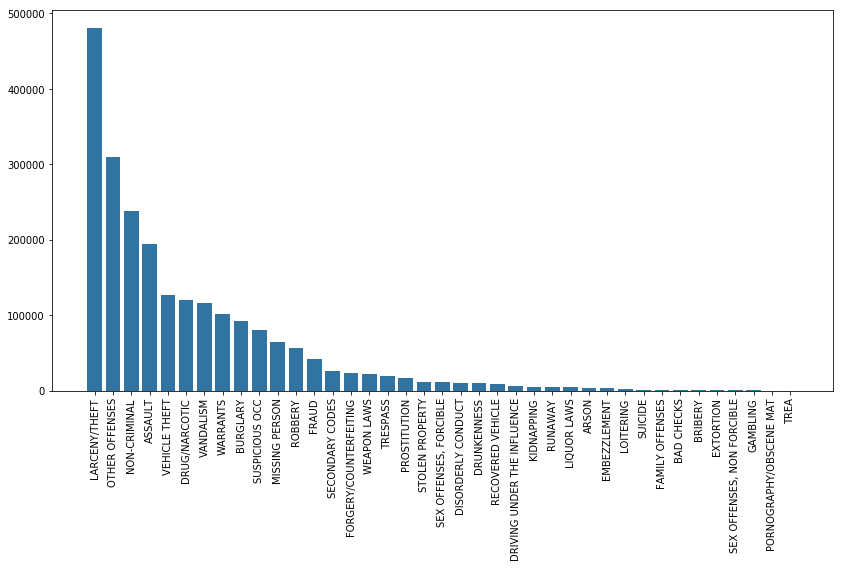

In [10]:
plt.figure(figsize = [14, 7])
sb.barplot(x = list(df.Category.value_counts().index), y = list(df.Category.value_counts().values), color = sb.color_palette()[0]);
plt.xticks(rotation = 90);
plt.margins(x = 0.05);

_4. Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2017 (since we don't have full data for 2018). What's the average number of crimes per year?_

In [11]:
df['Year'] = df.Date.apply(lambda text: text.split('/')[2])

In [12]:
df.groupby(df.Year).IncidntNum.count()

Year
2003    149176
2004    148148
2005    142186
2006    137853
2007    137639
2008    141311
2009    139860
2010    133523
2011    132697
2012    140847
2013    152806
2014    150128
2015    156526
2016    150883
2017    154773
2018     46668
Name: IncidntNum, dtype: int64

_5. Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017._

In [13]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [14]:
df_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'Year']).size().unstack()
df_grouped.drop(columns = ['2018'], inplace = True)
df_grouped

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Category,,,,,,,,,,,,,,,
ASSAULT,13461,12899,11601,12449,12518,12681,12284,12387,12279,12181,12580,12402,13115,13603,13655
BURGLARY,6047,6753,7071,7004,5454,5679,5379,4966,4987,6243,6195,6066,5931,5813,5857
DISORDERLY CONDUCT,886,814,687,521,581,789,956,827,762,704,464,345,551,659,399
DRIVING UNDER THE INFLUENCE,289,244,196,266,313,408,579,458,470,421,448,381,430,378,299
DRUG/NARCOTIC,9917,9897,8533,9069,10560,11648,11950,9205,6935,6444,6775,5408,4251,4246,3308
DRUNKENNESS,662,600,636,703,671,710,804,706,652,644,954,620,576,465,339
LARCENY/THEFT,26393,24505,25319,27352,25770,25807,25585,24446,25905,30976,36412,38003,42068,40449,47826
PROSTITUTION,1952,1527,1103,1290,1873,1673,1468,1299,1094,690,692,449,374,642,527
ROBBERY,3204,3380,3566,4131,4027,4229,3578,3324,3376,3955,4196,3420,3759,3300,3351


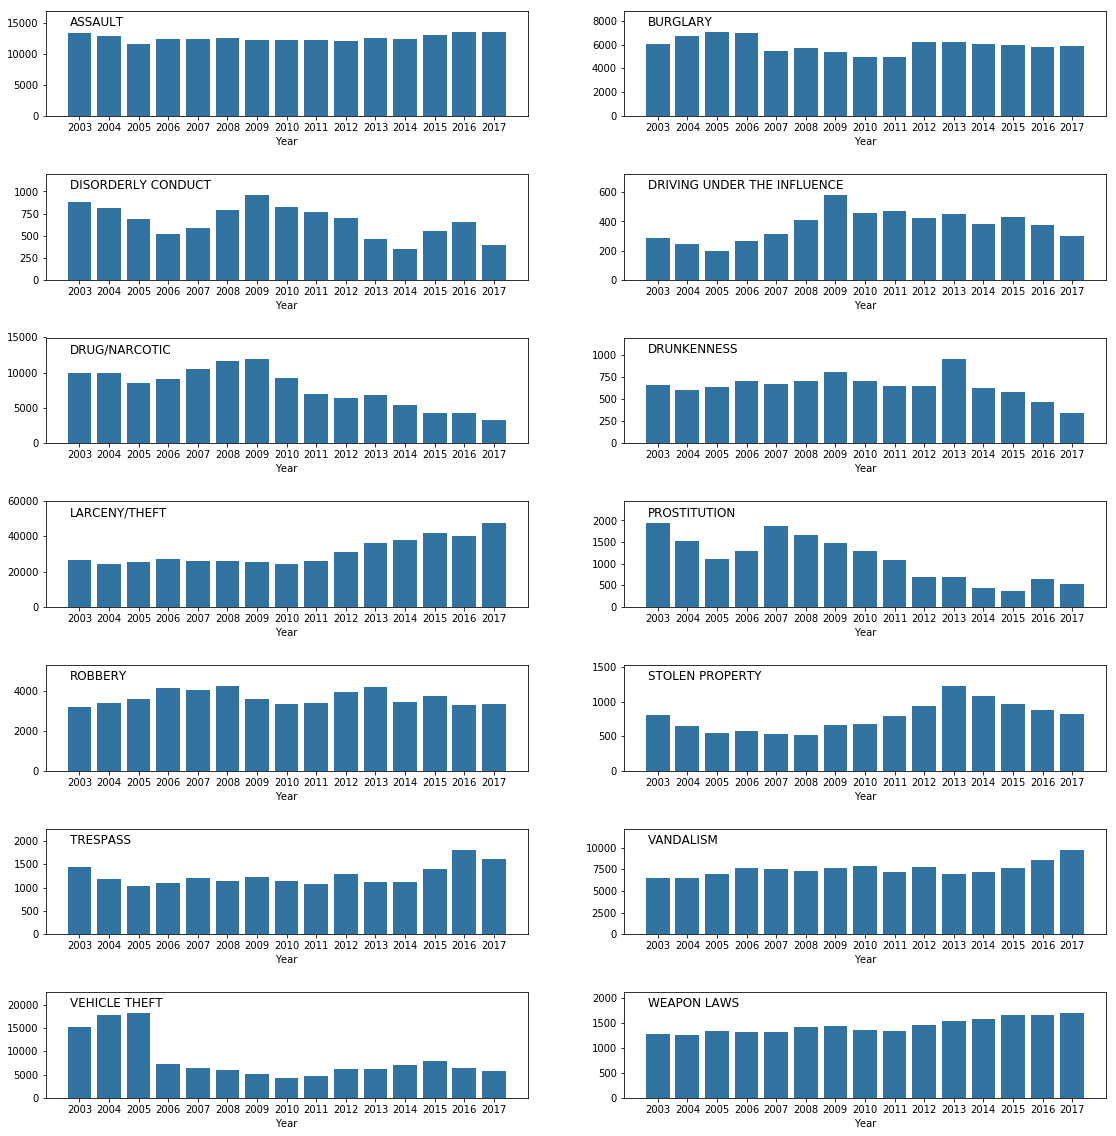

In [45]:
fig = plt.figure(figsize=(19, 20))

for plot_index in range(1, 15):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(7, 2, plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
    ax = sb.barplot(x = df_grouped.iloc[plot_index - 1].index, y = df_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_grouped.iloc[plot_index - 1].name, y = 0.80, x = 0.05, loc = 'left') # set indentation 'left' and x, y added/subtracted, compared to the default values

In [50]:
df_grouped.loc['ASSAULT'].sort_values()

Year
2005    11601
2012    12181
2011    12279
2009    12284
2010    12387
2014    12402
2006    12449
2007    12518
2013    12580
2008    12681
2004    12899
2015    13115
2003    13461
2016    13603
2017    13655
Name: ASSAULT, dtype: int64

*6. Comment on at least three interesting trends in your plot. Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems'.*

_We can see many interesting trends in the plots, out of which we will mention:_
* The number of assault cases has been almost constant throughout the whole period from 2003 to 2017, with a maximum deviation of 2000 cases over the years.
* Vehicle thefts dropped significantly from almost 20000 cases/year in __2005__ to 5000-7000 cases/year in all years __after 2005__.
* Both Prostitution and Drug/Narcotic usage cases have been constantly dropping significantly after **2010**.

There's much more to work on in this dataset (for example, I also explored if certain crimes tend to happen on certain week-days ... also some interesting patterns there!), but we have lots to do, so we must rush onwards.

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

>Exercises: The types of crime and how they take place across San Francisco's police districts.
>
>
> 7. So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>
>
> 8. Which has the most crimes? Which has the most focus crimes?
>
>
> 9. Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>
>
>    * 9.1. First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. Let's call it `P(crime)`.
>
>
>    * 9.2. Next, we calculate that same probability distribution but for each PD district. Let's call that `P(crime|district)`.
>
>
>    * 9.3. Now we look at the ratio `P(crime|district)` **/** `P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer_ within the district in question than in the city as a whole.
>
>
>    * 9.4. For each district plot these ratios for the 14 focus crimes.
>
>
>    * 9.5. Comment on the top crimes in Tenderloin, Mission, and Richmond. Does this fit with the impression you get of these neighborhoods on Wikipedia?

_7. So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts._

In [55]:
df.PdDistrict.unique()

array(['MISSION', 'TENDERLOIN', 'NORTHERN', 'RICHMOND', 'BAYVIEW',
       'CENTRAL', 'PARK', 'TARAVAL', 'SOUTHERN', 'INGLESIDE', nan],
      dtype=object)

_8. Which has the most crimes? Which has the most focus crimes?_

In [63]:
df.groupby('PdDistrict')['Category'].count().sort_values(ascending = False)

PdDistrict
SOUTHERN      399785
MISSION       300076
NORTHERN      272713
CENTRAL       226255
BAYVIEW       221000
INGLESIDE     194180
TENDERLOIN    191746
TARAVAL       166971
PARK          125479
RICHMOND      116818
Name: Category, dtype: int64

In [64]:
df[df.Category.isin(focuscrimes)].groupby('PdDistrict')['Category'].count().sort_values(ascending = False)

PdDistrict
SOUTHERN      231125
NORTHERN      175525
MISSION       167757
CENTRAL       142378
BAYVIEW       118026
TENDERLOIN    108085
INGLESIDE     107654
TARAVAL        92254
PARK           69397
RICHMOND       68452
Name: Category, dtype: int64

_Southern_ district has both most number of crimes and of focus crimes.

_9. Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:_

_9.1. First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. Let's call it `P(crime)`._

In [361]:
p_crime = pd.Series()

for category in df.Category.unique():
    # We will store in p_crime the probability as value and the crime category as index
    p_crime.set_value(category, len(df[df.Category == category]) / len(df))
    
    print('P(' + str(category) + ') = ' + str(len(df[df.Category == category]) / len(df)))
    
p_crime.sort_index(inplace = True)

C:\Users\XPS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


P(NON-CRIMINAL) = 0.10759386805741157
P(ROBBERY) = 0.02522184861202407
P(ASSAULT) = 0.08789701601427344
P(SECONDARY CODES) = 0.011661724658513858
P(VANDALISM) = 0.052396272004276254
P(BURGLARY) = 0.041328220371427124
P(LARCENY/THEFT) = 0.21690419607191616
P(DRUG/NARCOTIC) = 0.05400754122754426
P(WARRANTS) = 0.04576880431092394
P(VEHICLE THEFT) = 0.05715603984426354
P(OTHER OFFENSES) = 0.13966349800273045
P(WEAPON LAWS) = 0.01003781448869177
P(ARSON) = 0.0017746986037171606
P(MISSING PERSON) = 0.02932744746783782
P(DRIVING UNDER THE INFLUENCE) = 0.0025606946019546516
P(SUSPICIOUS OCC) = 0.036317439449866006
P(RECOVERED VEHICLE) = 0.003934946077333699
P(DRUNKENNESS) = 0.004436069315727505
P(TRESPASS) = 0.008780491768937944
P(FRAUD) = 0.018754650062482392
P(DISORDERLY CONDUCT) = 0.0045326822643908145
P(SEX OFFENSES, FORCIBLE) = 0.005301071229927983
P(FORGERY/COUNTERFEITING) = 0.010406207788267757
P(KIDNAPPING) = 0.0024135178670750294
P(EMBEZZLEMENT) = 0.0013489695822708919
P(STOLEN PROPER

In [174]:
# Check to see whether all the probabilities of the values were correctly computed, then the total probability should be 1.0
p_crime.sort_values().sum()

1.0

_9.2. Next, we calculate that same probability distribution but for each PD district. Let's call that P(crime|district)._

In [451]:
df_grouped_district = df.groupby(['Category', 'PdDistrict']).size()

p_crime_by_district = pd.Series()
p_crime_by_district = p_crime_by_district.reindex(df_grouped_district.index)
p_crime_by_district = p_crime_by_district.fillna(0.00)

for category_and_district_index in df_grouped_district.index:
    # category_and_district_index[0] is the CATEGORY and category_and_district_index[1] is the DISTRICT
    crime_cat_by_district = df_grouped_district.xs(category_and_district_index[0])
    
    p_crime_by_district.xs(category_and_district_index[0])[category_and_district_index[1]] = (crime_cat_by_district[category_and_district_index[1]]) / (df.groupby(['PdDistrict']).size()[category_and_district_index[1]])

_9.3. Now we look at the ratio P(crime|district) / P(crime). That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs more frequently within that district. If it's smaller than one, it means that the crime is rarer within the district in question than in the city as a whole._

In [466]:
ratio_crime_by_district = pd.Series()
ratio_crime_by_district = ratio_crime_by_district.reindex(p_crime_by_district.index)
ratio_crime_by_district = ratio_crime_by_district.fillna(0.00)

for category_and_district_index in p_crime_by_district.index:
    
    # category_and_district_index[0] is the CATEGORY and category_and_district_index[1] is the DISTRICT
    ratio_crime_by_district.xs(category_and_district_index[0])[category_and_district_index[1]] = p_crime_by_district.xs(category_and_district_index[0])[category_and_district_index[1]] / p_crime[category_and_district_index[0]]

_9.4. For each district plot these ratios for the 14 focus crimes._

In [467]:
# First, we will need swap indexes, so that DISTRICT is the first level and CATEGORY is the inner one
# This helps us easily create a plot through iterating between each DISTRICT type, and having all crime category probabilities sorted and available

ratio_crime_by_district = ratio_crime_by_district.swaplevel().sort_index()

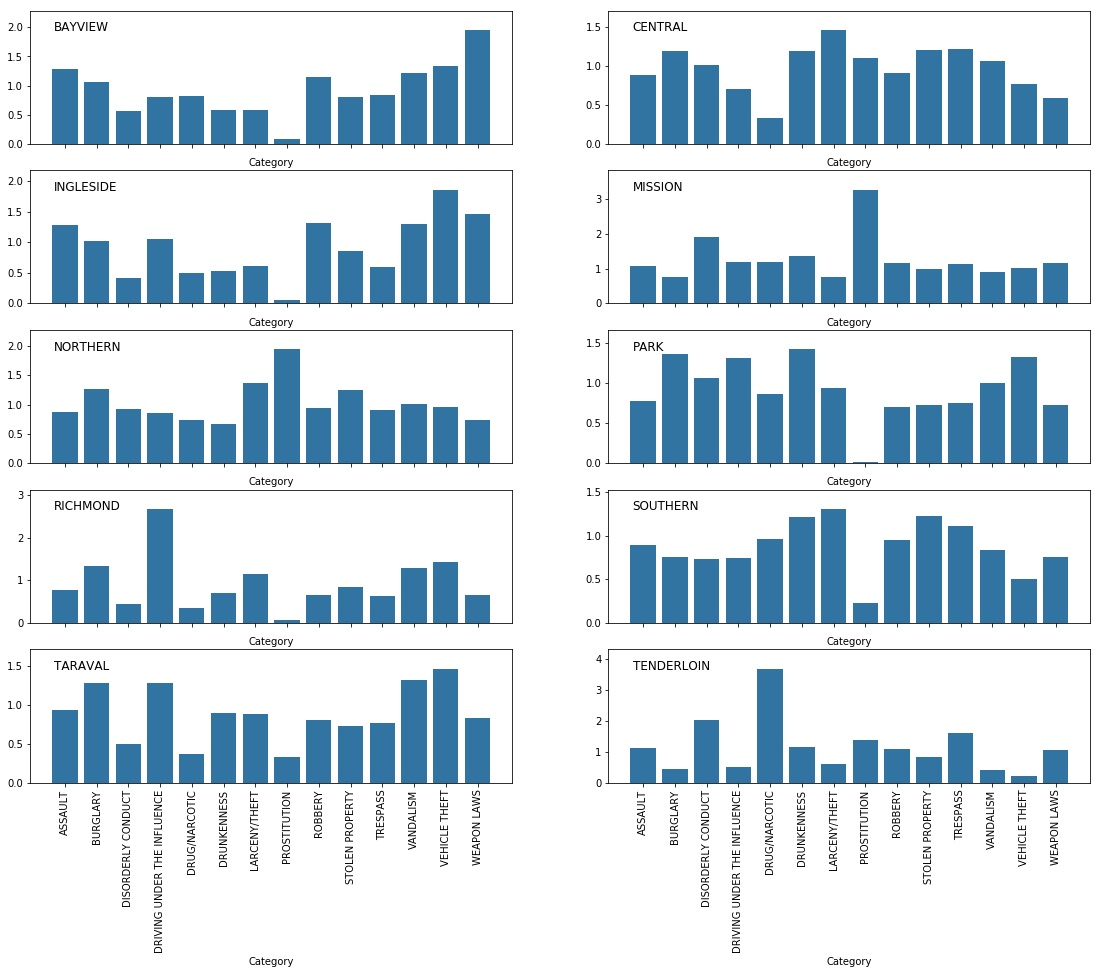

In [468]:
fig = plt.figure(figsize=(19, 14.2))

for plot_index in range(1, 11):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(5, 2, plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.20)
    
    district = pd.Series(df.PdDistrict.dropna().unique()).sort_values().values[plot_index - 1]
    ratio_crime_names = ratio_crime_by_district.xs(district).loc[ratio_crime_by_district.xs(district).index.isin(focuscrimes)].index
    ratio_values = ratio_crime_by_district.xs(district).loc[ratio_crime_by_district.xs(district).index.isin(focuscrimes)].values
    
    ax = sb.barplot(x = ratio_crime_names, y = ratio_values, color = sb.color_palette()[0])
    
    if ((plot_index != 10) & (plot_index != 9)): # if the plot is not on the last row, don't show its x-axis ticks
        ax.set_xticklabels(' ')
        
    plt.margins(y = 0.17, x = 0.05) # set the inner margins between plot values and plot
    plt.title(district, y = 0.80, x = 0.05, loc = 'left') # set indentation 'left' and x, y added/subtracted, compared to the default values
    plt.xticks(rotation = 90)

_9.5. Comment on the top crimes in Tenderloin, Mission, and Richmond. Does this fit with the impression you get of these neighborhoods on Wikipedia?_

The top crime in Tenderloin is _Drugs/Narcotics_, in Mission it is _prostitution_, and in Richmond it is _Driving under influence_.

__Comment:__ Notice how much awesome datascience (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right?